In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#import tensorflow as tf
import numpy as np
import pandas as pd
#from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model, Sequential
#from pathlib import Path
import matplotlib.pyplot as plt
import requests
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display


2022-10-26 10:43:38.744707: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
from urllib3.exceptions import InsecureRequestWarning
from urllib3 import disable_warnings

disable_warnings(InsecureRequestWarning)

In [2]:
#data['user_id'] = pd.factorize(data['user_name'])[0]
#data.to_csv('user_item.csv')

In [3]:
data=pd.read_csv('user_item.csv')

In [4]:
image=data[['item_name','images']]
image=image.dropna()
#image=image.drop_duplicates(subset=['name'],keep='last')

def url_to_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((150,150),Image.ANTIALIAS)
    return img

In [5]:
data.head(2)

,id,discount_on_product,preparation_time,price,price_before_discount,quantity,updated_at,item_name,chef_name,user_name,category_name,diet_name,item_rating,chef_rating,description,category,incredients,images,item_id,user_id
0,0185cf68-4851-4d80-a10a-1942cdb7faa2,0.00,60,6.00,6.00,1,2022-07-08 21:02:16.533000,Paneer butter masala,Jinu Samuel,Vishnu,Indian,Vegetarian,3,3,Paneer butter Masala,Indian Vegetarian,"butter, paneer, onions, tomatoes, cashew powd...",https://kxbucket.s3.eu-central-1.amazonaws.com...,0,0
1,026c83cb-8222-47d8-805d-327f2c07c9b3,0.54,30,1.64,2.18,1,2022-06-27 08:59:05.312000,Falafel with Humus,R Rana,Vibin,Turkish,Vegetarian,4,4,"Falafel, a crispy pattie (or ball) made from (...",Turkish Vegetarian,"Chickpeas, Besan, Onion, Garlic Cloves, Ginge...",https://kxbucket.s3.eu-central-1.amazonaws.com...,1,1


In [6]:
df=data[['user_name','item_id','item_rating','updated_at']]

In [7]:
df.head(5)

,user_name,item_id,item_rating,updated_at
0,Vishnu,0,3,2022-07-08 21:02:16.533000
1,Vibin,1,4,2022-06-27 08:59:05.312000
2,R Rana,2,4,2022-07-30 16:05:56.655000
3,R Rana,3,2,2022-08-04 18:55:42.809000
4,kookxtra User 4,4,3,2022-07-17 13:05:59.193000


In [8]:
from datetime import datetime
df['date_time'] = pd.to_datetime(df['updated_at'])
epoch_time = datetime(1970, 1, 1)
df['timestamp'] = df.date_time.apply(lambda x: (x-epoch_time).total_seconds())

/tmp/ipykernel_20857/3636834585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['updated_at'])
/tmp/ipykernel_20857/3636834585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df.date_time.apply(lambda x: (x-epoch_time).total_seconds())


In [9]:
df.head(5)

,user_name,item_id,item_rating,updated_at,date_time,timestamp
0,Vishnu,0,3,2022-07-08 21:02:16.533000,2022-07-08 21:02:16.533,1.657314e+09
1,Vibin,1,4,2022-06-27 08:59:05.312000,2022-06-27 08:59:05.312,1.656320e+09
2,R Rana,2,4,2022-07-30 16:05:56.655000,2022-07-30 16:05:56.655,1.659197e+09
3,R Rana,3,2,2022-08-04 18:55:42.809000,2022-08-04 18:55:42.809,1.659639e+09
4,kookxtra User 4,4,3,2022-07-17 13:05:59.193000,2022-07-17 13:05:59.193,1.658063e+09


In [10]:
df.drop(['updated_at','date_time'],axis=1,inplace=True)

/tmp/ipykernel_20857/1583645061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['updated_at','date_time'],axis=1,inplace=True)


In [11]:
users=df['user_name'].unique().tolist()

In [12]:
#mapping user id to its index in the list ‘users’, ie., key will be the user id and its value will be the index in the list ‘users’
user2user_encoded={x:i for i, x in enumerate(users)}

#which is the reverse of the previous dictionary, ie., in this case the key becomes the index and the value becomes the user id
userencoded2user={i:x for i, x in enumerate(users)}

In [13]:
user2user_encoded.values()
#userencoded2user

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [14]:
items=df['item_id'].unique().tolist()
item2item_encoded={x:i for i, x in enumerate(items)}
itemencoded2item={i:x for i, x in enumerate(items)}

In [15]:
df['user']=df['user_name'].map(user2user_encoded)
df['item']=df['item_id'].map(item2item_encoded)

/tmp/ipykernel_20857/2180613619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user']=df['user_name'].map(user2user_encoded)
/tmp/ipykernel_20857/2180613619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item']=df['item_id'].map(item2item_encoded)


In [16]:
df[['user_name','item_id','item_rating','user','item']].head(5)

,user_name,item_id,item_rating,user,item
0,Vishnu,0,3,0,0
1,Vibin,1,4,1,1
2,R Rana,2,4,2,2
3,R Rana,3,2,2,3
4,kookxtra User 4,4,3,3,4


In [17]:
num_users=len(user2user_encoded)
num_items=len(item2item_encoded)
df['item_rating']=df['item_rating'].values.astype(np.float32)

#min and max ratings will be used tonormalize the ratings
min_rating=min(df['item_rating'])
max_rating=max(df['item_rating'])



/tmp/ipykernel_20857/3645639239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_rating']=df['item_rating'].values.astype(np.float32)


In [18]:
print('Number of users: {}, Number of items: {}, Min rating: {}, Max rating: {}'.format(num_users,num_items,min_rating,max_rating))

Number of users: 65, Number of items: 57, Min rating: 2.0, Max rating: 5.0


In [19]:
df=df.sample(frac=1,random_state=42) #randomly sample the dataset
x=df[['user','item']]

#normalize the targets between 0 and 1 makes it easy to train
y=df['item_rating'].apply(lambda x: (x-min_rating)/(max_rating-min_rating)).values

#assuming training on 90%data and validating on 10%

train_indices=int(0.9*df.shape[0])
x_train,x_val,y_train,y_test = (x[:train_indices],x[train_indices:],y[:train_indices],y[train_indices:])

In [20]:
x_train.shape

(149, 2)

In [21]:
x_val.shape

(17, 2)

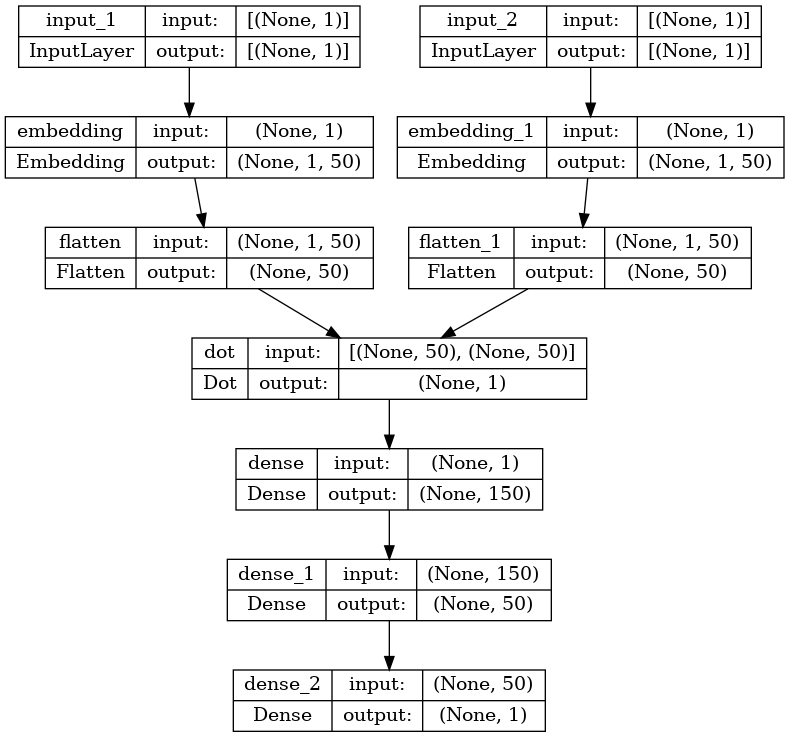

In [22]:
embedding_size=50

user_ips=layers.Input(shape=[1])
user_embedding=layers.Embedding(num_users,embedding_size,embeddings_initializer='he_normal',embeddings_regularizer=keras.regularizers.l2(1e-6))(user_ips)

user_vect=layers.Flatten()(user_embedding)

item_ips=layers.Input(shape=[1])
item_embedding=layers.Embedding(num_items,embedding_size,embeddings_initializer='he_normal',embeddings_regularizer=keras.regularizers.l2(1e-6))(item_ips)

item_vect=layers.Flatten()(item_embedding)

prod=layers.dot(inputs=[user_vect,item_vect],axes=1)

dense1=layers.Dense(150,activation='relu', kernel_initializer='he_normal')(prod)
dense2=layers.Dense(50,activation='relu',kernel_initializer='he_normal')(dense1)
dense3=layers.Dense(1,activation='relu')(dense2)

model=Model([user_ips,item_ips],dense3)
model.compile(optimizer='adam',loss='mean_squared_error')

keras.utils.plot_model(model,show_shapes=True)


In [23]:
x_train.iloc[0:2,0:1]

,user
100,5
136,59


In [24]:
history=model.fit([x_train.iloc[:,0], x_train.iloc[:,1]], y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.1244
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.1144
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0772
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0580
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.0367


In [25]:
pred= model.predict([x_train.iloc[4:5,0], x_train.iloc[4:5,1]])
pred

1/1 [==============================] - 0s 62ms/step


array([[0.33894622]], dtype=float32)

In [26]:
item_df=data[['item_id','item_name','category']]

In [27]:
item_df=item_df.drop_duplicates()

In [28]:
item_df.shape

(57, 3)

In [29]:
#pickle.dump(item_df,open('item_df.pkl','wb'))

In [78]:
customer=df.user_name.sample(1).iloc[0]
items_prefered_by_user=df[df.user_name==customer]
items_not_prefered=item_df[ ~item_df['item_id'].isin(items_prefered_by_user.item.values)]['item_id']

In [79]:
customer

'Nakul chandra'

In [74]:
df.user_name.sample(1).iloc[0]

'sunaina joseph'

In [80]:
item_df[item_df['item_id'].isin(items_prefered_by_user.item.values)]

,item_id,item_name,category
77,32,Onam Sadya,Indian Vegetarian


In [81]:
items_prefered_by_user

,user_name,item_id,item_rating,timestamp,user,item
81,Nakul chandra,32,3.0,1.662500e+09,37,32


In [82]:
len(items_not_prefered)

56

In [83]:
customer

'Nakul chandra'

In [84]:
items_not_prefered=list(set(items_not_prefered).intersection(set(item2item_encoded.keys())))

In [85]:
len(items_not_prefered)

56

In [86]:
items_not_prefered_index=[[item2item_encoded.get(x)] for x in items_not_prefered]
#items_not_prefered_index

In [87]:
user_encoder=user2user_encoded.get(customer)
user_encoder

37

In [70]:
user2user_encoded

{'Vishnu': 0,
 'Vibin': 1,
 'R Rana': 2,
 'kookxtra User 4': 3,
 'Amal Jo Mathew': 4,
 'kookxtra User 8': 5,
 'kookxtra User 6': 6,
 'kookxtra User 9': 7,
 'kookxtra User 2': 8,
 'Krishnaprasad Kodamana': 9,
 'kookxtra User 5': 10,
 'Kx ASP': 11,
 'Debaditya Roy': 12,
 'Tom': 13,
 'Manan Vohra': 14,
 'Murad': 15,
 'Alexandra': 16,
 'Rakesh Kumar': 17,
 'kookxtra User 3': 18,
 'kookxtra User 1': 19,
 'venkat': 20,
 'Eduard Budacu': 21,
 'Anitta pk': 22,
 'Art Srisayam': 23,
 'sunaina joseph': 24,
 'Shiju': 25,
 'Guto': 26,
 'Samad': 27,
 'kookxtra User 11': 28,
 'Anca': 29,
 'Agata': 30,
 'Donald de Jong': 31,
 'Shaun Thomas': 32,
 'kookxtra User': 33,
 'Sara': 34,
 'Christine': 35,
 'Tom Joseph': 36,
 'Nakul chandra': 37,
 'Jeena Mathews': 38,
 'Lakshmi Karat ': 39,
 'kookxtra User 18': 40,
 'kookxtra User 19': 41,
 'Saudamini ': 42,
 'Jibu Chacko': 43,
 'Nimisha': 44,
 'kookxtra User 14': 45,
 'mihaela azoitei': 46,
 'Sunil Babu': 47,
 'kookxtra User 15': 48,
 'Jiji': 49,
 'Rincy Sara

In [88]:
user_item_array=np.hstack(([[user_encoder]] * len(items_not_prefered), items_not_prefered_index))
user_item_array

array([[37,  0],
       [37,  1],
       [37,  2],
       [37,  3],
       [37,  4],
       [37,  5],
       [37,  6],
       [37,  7],
       [37,  8],
       [37,  9],
       [37, 10],
       [37, 11],
       [37, 12],
       [37, 13],
       [37, 14],
       [37, 15],
       [37, 16],
       [37, 17],
       [37, 18],
       [37, 19],
       [37, 20],
       [37, 21],
       [37, 22],
       [37, 23],
       [37, 24],
       [37, 25],
       [37, 26],
       [37, 27],
       [37, 28],
       [37, 29],
       [37, 30],
       [37, 31],
       [37, 33],
       [37, 34],
       [37, 35],
       [37, 36],
       [37, 37],
       [37, 38],
       [37, 39],
       [37, 40],
       [37, 41],
       [37, 42],
       [37, 43],
       [37, 44],
       [37, 45],
       [37, 46],
       [37, 47],
       [37, 48],
       [37, 49],
       [37, 50],
       [37, 51],
       [37, 52],
       [37, 53],
       [37, 54],
       [37, 55],
       [37, 56]])

In [90]:
ratings=model.predict([user_item_array[:,0],user_item_array[:,1]]).flatten()
ratings

2/2 [==============================] - 0s 2ms/step


array([0.31427646, 0.42634377, 0.30034515, 0.30294326, 0.38071477,
       0.25092778, 0.3496825 , 0.31260574, 0.16053605, 0.39001206,
       0.37628734, 0.3256227 , 0.46784508, 0.34837434, 0.5697324 ,
       0.186744  , 0.33238435, 0.38758916, 0.4420956 , 0.24433967,
       0.26616162, 0.3113353 , 0.3267408 , 0.3815397 , 0.41313615,
       0.30661812, 0.58760744, 0.34201413, 0.42948607, 0.35716775,
       0.15904887, 0.35811022, 0.38620695, 0.3470501 , 0.3260566 ,
       0.41738725, 0.2380679 , 0.16059911, 0.30413607, 0.24135977,
       0.17119484, 0.4127664 , 0.4253391 , 0.42538264, 0.30680946,
       0.39717576, 0.24551651, 0.32816043, 0.46390426, 0.52392226,
       0.31389722, 0.39476725, 0.5607984 , 0.33908373, 0.30170634,
       0.47054613], dtype=float32)

In [91]:
top_rating_indices = ratings.argsort()[-5:][::-1]

In [92]:
top_rating_indices

array([26, 14, 52, 49, 55])

In [65]:
top_rating_indices

array([50, 47,  4, 44,  1])

In [93]:
recommended_item_ids = [itemencoded2item.get(items_not_prefered_index[x][0]) for x in top_rating_indices]

In [94]:
print('showing recommendations for user: {}'.format(customer))
print('===='*9)
print('Items with high ratings from user')
print('----'*8)
top_movies_user = (items_prefered_by_user.sort_values(by='item_rating',ascending=False).head(5).item_id.values )

item_df_rows = item_df[item_df['item_id'].isin(top_movies_user)]
for row in item_df_rows.itertuples():
    print(row.item_name, ':', row.category)

showing recommendations for user: Nakul chandra
Items with high ratings from user
--------------------------------
Onam Sadya : Indian Vegetarian


In [95]:
print('----'*8)
print('Top 5 food recommendations')
print('----'*8)
recommended_items= item_df[item_df['item_id'].isin(recommended_item_ids)]
for row in recommended_items.itertuples():
    print(row.item_name, ':', row.category)

--------------------------------
Top 5 food recommendations
--------------------------------
Acaraje family box : Brazilian Non Vegetarian
Vegan Kunefe : Middle Eastern Vegetarian
chicken pakora : Indian 100% Halal
Vegetable cutlet : Indian Vegetarian
Daal Makhani : Indian Vegetarian


--------------------------------
Top 5 food recommendations
--------------------------------
Acaraje family box : Brazilian Non Vegetarian


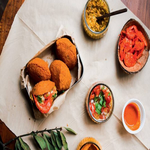

Vegan Kunefe : Middle Eastern Vegetarian


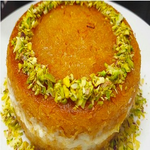

chicken pakora : Indian 100% Halal


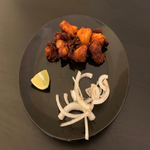

Vegetable cutlet : Indian Vegetarian


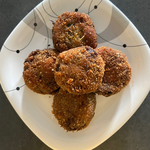

Daal Makhani : Indian Vegetarian


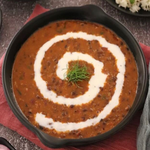

In [96]:
print('----'*8)
print('Top 5 food recommendations')
print('----'*8)
recommended_items= item_df[item_df['item_id'].isin(recommended_item_ids)]
for row in recommended_items.itertuples():
    print(row.item_name, ':', row.category)
    ima=url_to_image(image[image['item_name'] == row.item_name]['images'].values[0])
    display(ima)
    


In [59]:
lis=[]
pictures=[]
for row in recommended_items.itertuples():
    lis.append(row.item_name)
    pictures.append(image[image['item_name'] == row.item_name]['images'].values[0])



['https://kxbucket.s3.eu-central-1.amazonaws.com/Items/Malabar_Chicken_Dum_Biriyani_6264BF5D_01B1_42FE_8E2B_2D33EA5C2CF9350307840590990.jpeg',
 'https://kxbucket.s3.eu-central-1.amazonaws.com/Items/ACARAJ____data_user_0_com2112672588608863.kookxtra',
 'https://kxbucket.s3.eu-central-1.amazonaws.com/Items/Chicken_curry__private_var_mobile_Containers_Data_Application_C6470AE0_46AB_4B56_8C8B_D833E73A22C7_tmp_image_cropper_925376AD_367B_4812_9A29_319954DC8179_698_000000BBE15F39EF1152962046574038.jpg',
 'https://kxbucket.s3.eu-central-1.amazonaws.com/Items/Moqueca_with_Fish__Rice_and_Pir_o__data_user_0_com2113386552930097.kookxtra',
 'https://kxbucket.s3.eu-central-1.amazonaws.com/Items/Chole_bhature__private_var_mobile_Containers_Data_Application_FAE21BAE_2474_4EB0_B1B6_8DEB6AE23BD8_tmp_image_cropper_D53041AE_BEFF_4EF3_8F44_770D1BA27B29_343_000003031675F9931483713744407257.jpg']

In [27]:
import pickle

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [44]:
pickle.dump(df,open('data.pkl','wb'))


In [41]:
df

,user_name,item_id,item_rating,timestamp,user,item
100,kookxtra User 8,42,3.0,1.660654e+09,5,42
136,Rinku,36,2.0,1.660577e+09,59,36
78,Christine,33,2.0,1.663759e+09,35,33
56,Guto,16,3.0,1.660152e+09,26,16
97,Christine,41,3.0,1.663759e+09,35,41
...,...,...,...,...,...,...
71,Donald de Jong,28,2.0,1.662377e+09,31,28
106,Sara,31,3.0,1.661194e+09,34,31
14,R Rana,10,2.0,1.658348e+09,2,10
92,kookxtra User,37,2.0,1.661187e+09,33,37


In [75]:
pickle.dump(u,open('user.pkl','wb'))

In [65]:
u=pd.DataFrame(data[['user_name','user_id']])

In [70]:
u=u.drop_duplicates()

In [71]:
u.shape

(65, 2)

In [73]:
u

,user_name,user_id
0,Vishnu,0
1,Vibin,1
2,R Rana,2
4,kookxtra User 4,3
6,Amal Jo Mathew,4
...,...,...
137,Manu,60
138,kookxtra User 16,61
141,kookxtra User 22,62
158,Santosh,63
